In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
df=pd.read_csv('Dataset_n.csv')
df.columns=['ID','Gender','Daily spent time in social media (hour)','Are you happy with current situation?',
    'Do you start your day by planning(y/n)','Blood_pressure','Do you feel yourself depressed in a hostile situation?',   
    'Do you feel confident when you start any project?',
           'I try to do better than what is expected from me','Concerned about life (a) or goes too easy on life (b).',
    'Estimated work time per day.','Do you feel guilty if you use spare time to relax?',
    'Do you need to win in order to derive enjoyment from games and sports?',
    'Do you often try to do more than one thing at a time?','Do you find it difficult and frustrating to wait in line?',
    'Are you more of a morning person?','Would you consider yourself to be a perfectionist?']

df

,ID,Gender,Daily spent time in social media (hour),Are you happy with current situation?,Do you start your day by planning(y/n),Blood_pressure,Do you feel yourself depressed in a hostile situation?,Do you feel confident when you start any project?,I try to do better than what is expected from me,Concerned about life (a) or goes too easy on life (b).,Estimated work time per day.,Do you feel guilty if you use spare time to relax?,Do you need to win in order to derive enjoyment from games and sports?,Do you often try to do more than one thing at a time?,Do you find it difficult and frustrating to wait in line?,Are you more of a morning person?,Would you consider yourself to be a perfectionist?
0,151341021,Male,2019-05-02 00:00:00,Yes,No,Low,Maybe,Yes,True,A,3 hrs,No,No,Yes,Yes,No,Yes
1,151341012,Male,Below 1 hour,Yes,Maybe,Normal,No,No,True,B,4,Maybe,Maybe,No,Yes,Maybe,No
2,151341008,Female,2019-05-02 00:00:00,No,Maybe,Low,Yes,No,False,B,8 hour,No,Yes,Yes,Yes,Yes,No
3,151341011,Male,2019-05-02 00:00:00,No,No,Normal,Yes,Yes,True,A,3hour,Maybe,No,Yes,Maybe,No,Maybe
4,151341029,Male,Below 1 hour,Maybe,No,Normal,No,Yes,True,A,10,Maybe,No,Yes,Maybe,No,Yes
5,151341005,Female,2019-05-02 00:00:00,Yes,No,Normal,Yes,No,False,A,5,No,Yes,Yes,Yes,Yes,No
6,151341006,Female,Above 5 hour,No,No,Normal,No,No,True,A,2 hour,Maybe,Yes,Maybe,Yes,No,No
7,151341023,Female,2019-05-02 00:00:00,No,Maybe,Low,No,No,True,B,3/4 hours,Maybe,Yes,Maybe,Yes,No,Maybe
8,151341009,Female,2019-05-02 00:00:00,Yes,Yes,Normal,Yes,Yes,True,A,0,Yes,No,No,Maybe,No,No
9,151341014,Male,2019-05-02 00:00:00,Maybe,No,Normal,Maybe,No,False,A,2,No,No,Maybe,Yes,No,No


In [24]:
df=df.drop(df.columns[[0,2,3,4,6,7,10]],axis=1)
df.head()

,Gender,Blood_pressure,I try to do better than what is expected from me,Concerned about life (a) or goes too easy on life (b).,Do you feel guilty if you use spare time to relax?,Do you need to win in order to derive enjoyment from games and sports?,Do you often try to do more than one thing at a time?,Do you find it difficult and frustrating to wait in line?,Are you more of a morning person?,Would you consider yourself to be a perfectionist?
0,Male,Low,True,A,No,No,Yes,Yes,No,Yes
1,Male,Normal,True,B,Maybe,Maybe,No,Yes,Maybe,No
2,Female,Low,False,B,No,Yes,Yes,Yes,Yes,No
3,Male,Normal,True,A,Maybe,No,Yes,Maybe,No,Maybe
4,Male,Normal,True,A,Maybe,No,Yes,Maybe,No,Yes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 10 columns):
Gender                                                                    68 non-null object
Blood_pressure                                                            68 non-null object
I try to do better than what is expected from me                          68 non-null bool
Concerned about life (a) or goes too easy on life (b).                    68 non-null object
Do you feel guilty if you use spare time to relax?                        68 non-null object
Do you need to win in order to derive enjoyment from games and sports?    68 non-null object
Do you often try to do more than one thing at a time?                     68 non-null object
Do you find it difficult and frustrating to wait in line?                 68 non-null object
Are you more of a morning person?                                         68 non-null object
Would you consider yourself to be a perfectionist?            

In [26]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Gender'])
df['Gender'] = labelEncoder.transform(df['Gender'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['I try to do better than what is expected from me'])
df['I try to do better than what is expected from me'] = labelEncoder.transform(df['I try to do better than what is expected from me'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Concerned about life (a) or goes too easy on life (b).'])
df['Concerned about life (a) or goes too easy on life (b).'] = labelEncoder.transform(df['Concerned about life (a) or goes too easy on life (b).'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Do you feel guilty if you use spare time to relax?'])
df['Do you feel guilty if you use spare time to relax?'] = labelEncoder.transform(df['Do you feel guilty if you use spare time to relax?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Do you need to win in order to derive enjoyment from games and sports?'])
df['Do you need to win in order to derive enjoyment from games and sports?'] = labelEncoder.transform(df['Do you need to win in order to derive enjoyment from games and sports?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Do you often try to do more than one thing at a time?'])
df['Do you often try to do more than one thing at a time?'] = labelEncoder.transform(df['Do you often try to do more than one thing at a time?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Do you find it difficult and frustrating to wait in line?'])
df['Do you find it difficult and frustrating to wait in line?'] = labelEncoder.transform(df['Do you find it difficult and frustrating to wait in line?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Are you more of a morning person?'])
df['Are you more of a morning person?'] = labelEncoder.transform(df['Are you more of a morning person?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Would you consider yourself to be a perfectionist?'])
df['Would you consider yourself to be a perfectionist?'] = labelEncoder.transform(df['Would you consider yourself to be a perfectionist?'])

In [27]:
df['Blood_pressure'] = df['Blood_pressure'].astype('category')
df.Blood_pressure = df.Blood_pressure.cat.rename_categories([0,1,2])
D=df.values

In [33]:
D=df.values
# Get the labelled set
c1=D[:18,:]; c2=D[24:42,:];  c3=D[47:60,:]
trainSet = np.concatenate((c1,c2,c3),axis=0)

# Get the testing set
c1 = D[18:24,:]; c2=D[42:47,:];  c3=D[60:,:]
testSet = np.concatenate((c1,c2,c3),axis=0)

print(trainSet.shape)
print(testSet.shape)

xTrain_1=trainSet[:,0:1]
xTrain_2=trainSet[:,2:]
xTrain = np.concatenate((xTrain_1,xTrain_2),axis=1)
yTrain=trainSet[:,1]
xTest_1=testSet[:,0:1]
xTest_2=testSet[:,2:]
xTest = np.concatenate((xTest_1,xTest_2),axis=1)
yTest=testSet[:,1]

(49, 10)
(19, 10)


In [34]:
# create a knn classifier with K=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(xTrain, yTrain.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [35]:
# Make predictions
yPred=clf.predict(xTest)
acc=accuracy_score(yTest.astype(int), yPred.astype(int))
print('Accuracy with 3 neighbours: ',acc)

Accuracy with 3 neighbours:  0.6842105263157895


In [36]:
def plot_conf_mat(lTrue, lPred, title):
    """ A function for plotting the confusion matrix given true and predicted labels."""
    cm = confusion_matrix(lTrue.astype(int), lPred.astype(int))
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

[[ 0  0  0]
 [ 1  0  3]
 [ 1  1 13]]


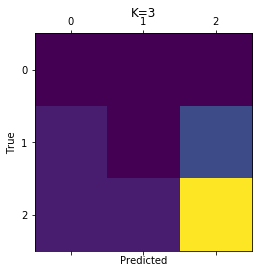

In [37]:
plot_conf_mat(yTest, yPred, 'K=3')